In [1]:
%pylab inline
import json
import math
import string
import numpy as np
import pandas as pd
import scipy.stats as stats
from suffix_tree import SuffixTree
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

Populating the interactive namespace from numpy and matplotlib


In [29]:
fileclustering = '/Users/riccardo/Documents/PhD/Cooppometro/cooppometro/experiments/20160419_dsaa/img/k-means_cosine_filt/'
fileclustering += 'cosine_distance_filt_customers2cluster.csv'

In [30]:
df = pd.read_csv(fileclustering, sep=';', skipinitialspace=True)

In [41]:
customerid_ind = defaultdict(list)
customerid_col = defaultdict(set)
colid_customers = defaultdict(set)

for row in df.values:
    ind = row[1]
    customerid = row[3]
    col = row[4]
    customerid_ind[customerid].append(ind)
    customerid_col[customerid].add(col)
    colid_customers[col].add(customerid)

In [42]:
individual_nbr = dict()
collective_nbr = dict()
for customer_id in customerid_ind:
    individual_nbr[customer_id] = len(customerid_ind[customer_id])
    collective_nbr[customer_id] = len(customerid_col[customer_id])

In [60]:
len(colid_customers[38])

9995

In [61]:
','.join([str(i) for i in colid_customers[38]])

'294926,327705,262172,50102301,163875,65572,50292695,262186,333149,32817,32819,54,131128,98361,32827,29786174,32831,50102338,196675,229448,360524,163917,458831,131156,262229,131158,76473,234852,163931,131164,131168,163939,493194,180242,557166,163951,163954,327801,50102399,163974,327815,163981,568003,655511,163995,852127,196771,131236,166,589991,688297,32938,780467,45203485,229553,458930,98483,32948,183,295096,26111665,32954,32956,655554,557251,11421440,4620490,50102480,5496,196819,65753,50102497,655587,50102501,164075,65776,50207267,590067,98548,164085,327927,164091,278570,721150,688387,50226908,688390,12011,50004241,98585,36733210,196891,164124,491808,50102566,196906,307,65844,314,318,328004,262471,295240,98638,491860,262486,295255,262489,65882,491871,688482,196667,721257,13205866,50102638,371,131444,295285,36471158,50299256,45220218,98694,754057,328074,98699,721292,229443,50299287,491928,98715,229789,491939,229800,197033,393288,50102706,98744,444,819648,295368,458828,295374,213069,13

In [62]:
regular_customers = list()
changing_customers = list()
for customer_id, val in collective_nbr.iteritems():
    if val <= 4:
        regular_customers.append(customer_id)
    else:
        changing_customers.append(customer_id)

In [65]:
','.join([str(i) for i in regular_customers])

'262146,262147,262154,262160,262171,262178,262185,262194,524340,524358,480609,524362,786513,262228,262245,262247,262250,117,135,262284,262286,262294,568004,166,262352,786663,262383,253,258,524547,271,786705,524578,524587,524588,786734,524592,524594,311,314,262469,262470,262476,262478,336,262481,262486,43657,367,371,786826,786829,402,786499,786853,262568,786858,262577,786870,445,262590,262596,262602,820545,262611,473,262628,524834,94,787008,577,581,787027,601,787040,787042,349627,613,645,787086,660,524949,662,262829,305955,737,262886,262894,787184,754,771,786,305966,43650,305543,787244,787246,819,787267,837,855,877,263032,263033,263038,787329,900,786582,787336,907,263061,263074,47906415,525225,263092,263101,263103,525280,525285,525286,1003,44827648,1026,29434359,279364,787484,263211,787502,263225,263230,263233,1100,263245,1105,263252,263253,263263,263270,263271,263272,787574,263287,787614,263327,787622,263336,1203,1215,263364,263366,1236,263383,263399,525553,263411,263413,263422,263424,

In [66]:
','.join([str(i) for i in changing_customers])

'262148,262153,262156,13,786446,524313,262170,262172,262180,262182,262183,262186,54,57,64,524355,524366,480611,262229,43648,262236,262238,393235,262266,262267,786556,126,50069632,262282,262283,43714,262288,262290,43715,262296,262299,262304,262306,262307,43718,786601,262319,786609,262323,183,29534922,786653,236,786706,786707,131120,301,786737,307,385823,318,262471,786762,262477,262489,262496,786785,2097530,174826,43658,36700570,786850,786854,262567,262569,262572,429,262578,262579,262580,262583,444,262591,262593,262609,786909,262627,174852,524832,524835,699144,262711,262714,1311291,174858,226974,50070079,578,262726,41157198,699149,524890,262747,605,615,262760,305938,787060,36438645,87487,524924,524936,650,665,262825,262826,262832,262833,787123,787124,694,13632193,787140,787143,29622989,87501,787154,262870,262871,787165,43813,305958,262887,262888,525034,587636,29885185,772,279355,262924,805,174897,262953,810,813,787247,262966,823,262969,826,827,525116,787264,262994,480740,263004,263006,26

In [2]:
path = './'

In [3]:
profession_map = {
    'AGRICOLTORE': 'IMPIEGATO',
    'ALTRE PROFESSIONI': 'IMPIEGATO',
    'ARTIGIANO': 'IMPIEGATO',
    'CASALINGA': 'CASALINGA',
    'CLERO': 'IMPIEGATO',
    'COMMERCIANTE': 'IMPIEGATO',
    'COOP CONSUMO': 'IMPIEGATO',
    'DIRIGENTE DI AZIENDA': 'IMPIEGATO',
    'DISOCCUPATO': 'DISOCCUPATO',
    'ENTE PRIVATO': 'IMPIEGATO',
    'ENTE PUBBLICO': 'IMPIEGATO',
    'IMPIEGATO': 'IMPIEGATO',
    'INSEGNANTE': 'IMPIEGATO',
    'LAVORATORE AUTONOMO': 'IMPIEGATO',
    'LIBERO PROFESSIONISTA': 'IMPIEGATO',
    'MILITARE DI CARRIERA': 'IMPIEGATO',
    'NON INDICATA': 'DISOCCUPATO',
    'OPERAIO': 'IMPIEGATO',
    'PENSIONATO': 'PENSIONATO',
    'POSSIDENTE': 'IMPIEGATO',
    'STUDENTE': 'STUDENTE',
}

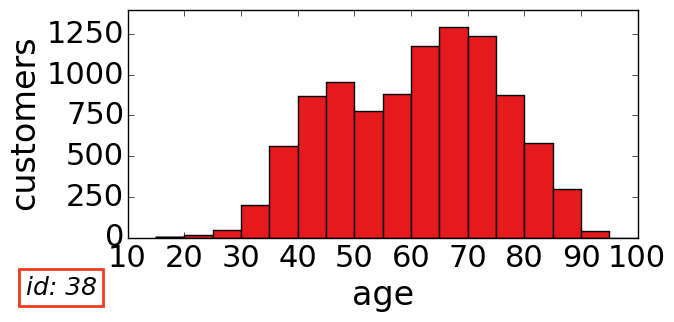

0.46, 0.34, 0.14, 0.03, 0.03, 


In [20]:
cluster_id = 38
data = open(path + 'col_clust%d.csv' % cluster_id, 'r')
header = data.readline().strip().split(';')
header[-1] = 'age'
header_map = {h: i for i, h in enumerate(header)}

ages = list()
sex_count = defaultdict(int)
civilstatus_count = defaultdict(int)
profession_count = defaultdict(int)

for row in data:
    fields = row.strip().split(';')
    if fields[header_map['age']] != '':
        if int(fields[header_map['age']]) <= 95:
            ages.append(int(fields[header_map['age']])-5)
            sex_count[fields[header_map['sesso']]] += 1
            civilstatus_count[fields[header_map['stato_civile']]] += 1
            profession_count[profession_map[fields[header_map['professione']]]] += 1
data.close()

fig, ax = plt.subplots(figsize=(6, 3))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)
plt.hist(ages, bins=range(15, 105, 5), color='#e41a1c')

plt.ylabel('customers', fontsize=24)
plt.xlabel('age', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.yticks(np.arange(0,1400,250))

ax.text(-8, -350, 'id: %d' % cluster_id, style='italic', fontsize=18,
            bbox={'facecolor': 'w', 'edgecolor':'#f03b20', 'pad':10, 'linewidth':2})

path_plot = './'
plt.savefig(path_plot + 'coop_categorization_col_clust%d.png' % cluster_id, format='png', bbox_inches='tight')
plt.show()

#print 'Age', '%.2f' % np.mean(ages), '%.2f' % np.median(ages), '%.2f' % np.std(ages)

#print '' 

#for k in sorted(sex_count):
#    print k, '%.2f' % (1.0*sex_count[k]/np.sum(sex_count.values()))

#print ''    

#for k in sorted(civilstatus_count, key=civilstatus_count.get, reverse=True):
#    print k, '%.2f' % (1.0*civilstatus_count[k]/np.sum(civilstatus_count.values()))

#print ''

#for k in sorted(profession_count, key=profession_count.get, reverse=True)[:5]:
#    print k, '%.2f' % (1.0*profession_count[k]/np.sum(profession_count.values()))
for k in ['IMPIEGATO', 'CASALINGA', 'PENSIONATO', 'STUDENTE', 'DISOCCUPATO']:
    print '%.2f,' % (1.0*profession_count[k]/np.sum(profession_count.values())),
print ''

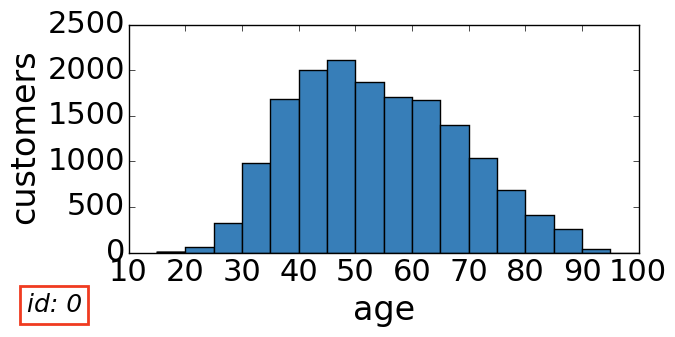

0.61, 0.21, 0.08, 0.06, 0.04, 


In [23]:
cluster_id = 0
data = open(path + 'col_clust00.csv', 'r')
header = data.readline().strip().split(';')
header[-1] = 'age'
header_map = {h: i for i, h in enumerate(header)}

ages = list()
sex_count = defaultdict(int)
civilstatus_count = defaultdict(int)
profession_count = defaultdict(int)

for row in data:
    fields = row.strip().split(';')
    if fields[header_map['age']] != '':
        if int(fields[header_map['age']]) <= 95:
            ages.append(int(fields[header_map['age']])-5)
            sex_count[fields[header_map['sesso']]] += 1
            civilstatus_count[fields[header_map['stato_civile']]] += 1
            profession_count[profession_map[fields[header_map['professione']]]] += 1
data.close()

fig, ax = plt.subplots(figsize=(6, 3))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)
plt.hist(ages, bins=range(15, 105, 5), color='#377eb8')

plt.ylabel('customers', fontsize=24)
plt.xlabel('age', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.yticks(np.arange(0,3000,500))

ax.text(-8, -650, 'id: %d' % cluster_id, style='italic', fontsize=18,
            bbox={'facecolor': 'w', 'edgecolor':'#f03b20', 'pad':10, 'linewidth':2})


path_plot = './'
plt.savefig(path_plot + 'coop_categorization_col_clust%d.png' % cluster_id, format='png', bbox_inches='tight')
plt.show()

#print 'Age', '%.2f' % np.mean(ages), '%.2f' % np.median(ages), '%.2f' % np.std(ages)

#print '' 

#for k in sorted(sex_count):
#    print k, '%.2f' % (1.0*sex_count[k]/np.sum(sex_count.values()))

#print ''    

#for k in sorted(civilstatus_count, key=civilstatus_count.get, reverse=True):
#    print k, '%.2f' % (1.0*civilstatus_count[k]/np.sum(civilstatus_count.values()))

#print ''

#for k in sorted(profession_count, key=profession_count.get, reverse=True)[:5]:
#    print k, '%.2f' % (1.0*profession_count[k]/np.sum(profession_count.values()))
for k in ['IMPIEGATO', 'CASALINGA', 'PENSIONATO', 'STUDENTE', 'DISOCCUPATO']:
    print '%.2f,' % (1.0*profession_count[k]/np.sum(profession_count.values())),
print ''

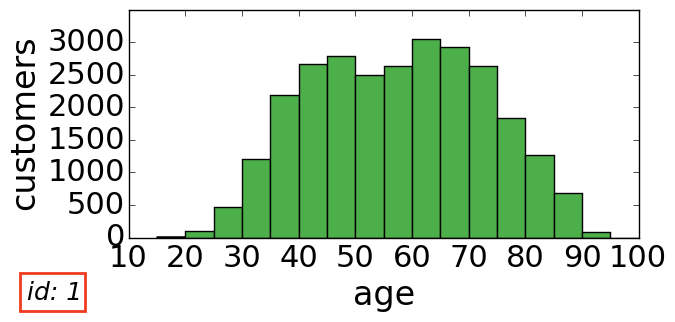

0.51, 0.30, 0.11, 0.05, 0.03, 


In [26]:
cluster_id = 1
data = open(path + 'col_clust01.csv', 'r')
header = data.readline().strip().split(';')
header[-1] = 'age'
header_map = {h: i for i, h in enumerate(header)}

ages = list()
sex_count = defaultdict(int)
civilstatus_count = defaultdict(int)
profession_count = defaultdict(int)

for row in data:
    fields = row.strip().split(';')
    if fields[header_map['age']] != '':
        if int(fields[header_map['age']]) <= 95:
            ages.append(int(fields[header_map['age']])-5)
            sex_count[fields[header_map['sesso']]] += 1
            civilstatus_count[fields[header_map['stato_civile']]] += 1
            profession_count[profession_map[fields[header_map['professione']]]] += 1
data.close()

fig, ax = plt.subplots(figsize=(6, 3))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)
plt.hist(ages, bins=range(15, 105, 5), color='#4daf4a')

plt.ylabel('customers', fontsize=24)
plt.xlabel('age', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.yticks(np.arange(0,3500,500))

ax.text(-8, -950, 'id: %d' % cluster_id, style='italic', fontsize=18,
            bbox={'facecolor': 'w', 'edgecolor':'#f03b20', 'pad':10, 'linewidth':2})


path_plot = './'
plt.savefig(path_plot + 'coop_categorization_col_clust%d.png' % cluster_id, format='png', bbox_inches='tight')
plt.show()

#print 'Age', '%.2f' % np.mean(ages), '%.2f' % np.median(ages), '%.2f' % np.std(ages)

#print '' 

#for k in sorted(sex_count):
#    print k, '%.2f' % (1.0*sex_count[k]/np.sum(sex_count.values()))

#print ''    

#for k in sorted(civilstatus_count, key=civilstatus_count.get, reverse=True):
#    print k, '%.2f' % (1.0*civilstatus_count[k]/np.sum(civilstatus_count.values()))

#print ''

#for k in sorted(profession_count, key=profession_count.get, reverse=True)[:5]:
#    print k, '%.2f' % (1.0*profession_count[k]/np.sum(profession_count.values()))
for k in ['IMPIEGATO', 'CASALINGA', 'PENSIONATO', 'STUDENTE', 'DISOCCUPATO']:
    print '%.2f,' % (1.0*profession_count[k]/np.sum(profession_count.values())),
print ''

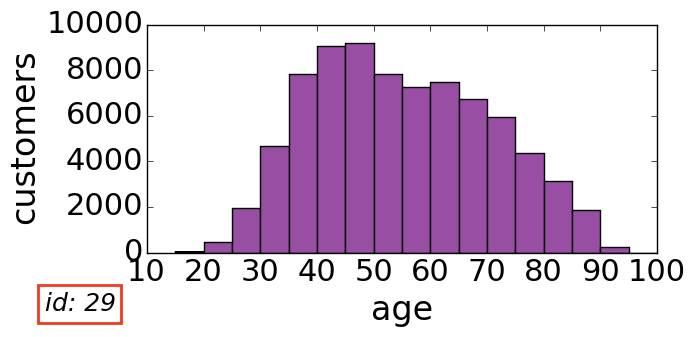

0.55, 0.26, 0.10, 0.06, 0.04, 


In [31]:
cluster_id = 29
data = open(path + 'col_clust29.csv', 'r')
header = data.readline().strip().split(';')
header[-1] = 'age'
header_map = {h: i for i, h in enumerate(header)}

ages = list()
sex_count = defaultdict(int)
civilstatus_count = defaultdict(int)
profession_count = defaultdict(int)

for row in data:
    fields = row.strip().split(';')
    if fields[header_map['age']] != '':
        if int(fields[header_map['age']]) <= 95:
            ages.append(int(fields[header_map['age']])-5)
            sex_count[fields[header_map['sesso']]] += 1
            civilstatus_count[fields[header_map['stato_civile']]] += 1
            profession_count[profession_map[fields[header_map['professione']]]] += 1
data.close()

fig, ax = plt.subplots(figsize=(6, 3))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)
plt.hist(ages, bins=range(15, 105, 5), color='#984ea3')

plt.ylabel('customers', fontsize=24)
plt.xlabel('age', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.yticks(np.arange(0,11000,2000))

ax.text(-8, -2550, 'id: %d' % cluster_id, style='italic', fontsize=18,
            bbox={'facecolor': 'w', 'edgecolor':'#f03b20', 'pad':10, 'linewidth':2})


path_plot = './'
plt.savefig(path_plot + 'coop_categorization_col_clust%d.png' % cluster_id, format='png', bbox_inches='tight')
plt.show()

#print 'Age', '%.2f' % np.mean(ages), '%.2f' % np.median(ages), '%.2f' % np.std(ages)

#print '' 

#for k in sorted(sex_count):
#    print k, '%.2f' % (1.0*sex_count[k]/np.sum(sex_count.values()))

#print ''    

#for k in sorted(civilstatus_count, key=civilstatus_count.get, reverse=True):
#    print k, '%.2f' % (1.0*civilstatus_count[k]/np.sum(civilstatus_count.values()))

#print ''

#for k in sorted(profession_count, key=profession_count.get, reverse=True)[:5]:
#    print k, '%.2f' % (1.0*profession_count[k]/np.sum(profession_count.values()))
for k in ['IMPIEGATO', 'CASALINGA', 'PENSIONATO', 'STUDENTE', 'DISOCCUPATO']:
    print '%.2f,' % (1.0*profession_count[k]/np.sum(profession_count.values())),
print ''

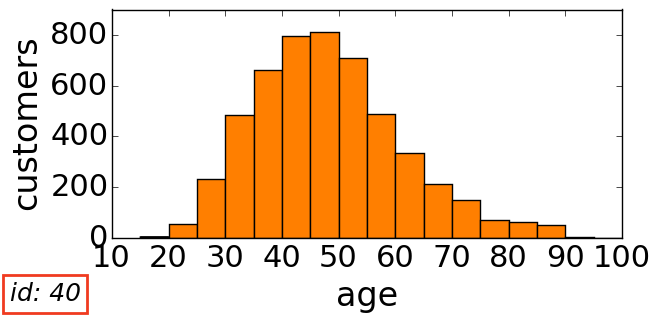

0.70, 0.14, 0.04, 0.09, 0.04, 


In [33]:
cluster_id = 40
data = open(path + 'col_clust40.csv', 'r')
header = data.readline().strip().split(';')
header[-1] = 'age'
header_map = {h: i for i, h in enumerate(header)}

ages = list()
sex_count = defaultdict(int)
civilstatus_count = defaultdict(int)
profession_count = defaultdict(int)

for row in data:
    fields = row.strip().split(';')
    if fields[header_map['age']] != '':
        if int(fields[header_map['age']]) <= 95:
            ages.append(int(fields[header_map['age']])-5)
            sex_count[fields[header_map['sesso']]] += 1
            civilstatus_count[fields[header_map['stato_civile']]] += 1
            profession_count[profession_map[fields[header_map['professione']]]] += 1
data.close()

fig, ax = plt.subplots(figsize=(6, 3))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)
plt.hist(ages, bins=range(15, 105, 5), color='#ff7f00')

plt.ylabel('customers', fontsize=24)
plt.xlabel('age', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.yticks(np.arange(0,1000,200))

ax.text(-8, -250, 'id: %d' % cluster_id, style='italic', fontsize=18,
            bbox={'facecolor': 'w', 'edgecolor':'#f03b20', 'pad':10, 'linewidth':2})


path_plot = './'
plt.savefig(path_plot + 'coop_categorization_col_clust%d.png' % cluster_id, format='png', bbox_inches='tight')
plt.show()

#print 'Age', '%.2f' % np.mean(ages), '%.2f' % np.median(ages), '%.2f' % np.std(ages)

#print '' 

#for k in sorted(sex_count):
#    print k, '%.2f' % (1.0*sex_count[k]/np.sum(sex_count.values()))

#print ''    

#for k in sorted(civilstatus_count, key=civilstatus_count.get, reverse=True):
#    print k, '%.2f' % (1.0*civilstatus_count[k]/np.sum(civilstatus_count.values()))

#print ''

#for k in sorted(profession_count, key=profession_count.get, reverse=True)[:5]:
#    print k, '%.2f' % (1.0*profession_count[k]/np.sum(profession_count.values()))
for k in ['IMPIEGATO', 'CASALINGA', 'PENSIONATO', 'STUDENTE', 'DISOCCUPATO']:
    print '%.2f,' % (1.0*profession_count[k]/np.sum(profession_count.values())),
print ''

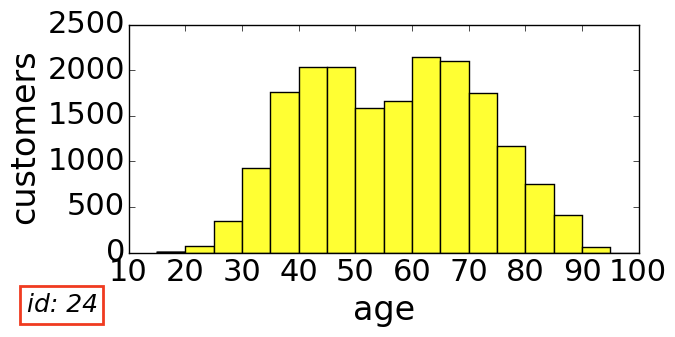

0.50, 0.31, 0.11, 0.05, 0.04, 


In [35]:
cluster_id = 24
data = open(path + 'col_clust24.csv', 'r')
header = data.readline().strip().split(';')
header[-1] = 'age'
header_map = {h: i for i, h in enumerate(header)}

ages = list()
sex_count = defaultdict(int)
civilstatus_count = defaultdict(int)
profession_count = defaultdict(int)

for row in data:
    fields = row.strip().split(';')
    if fields[header_map['age']] != '':
        if int(fields[header_map['age']]) <= 95:
            ages.append(int(fields[header_map['age']])-5)
            sex_count[fields[header_map['sesso']]] += 1
            civilstatus_count[fields[header_map['stato_civile']]] += 1
            profession_count[profession_map[fields[header_map['professione']]]] += 1
data.close()

fig, ax = plt.subplots(figsize=(6, 3))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)
plt.hist(ages, bins=range(15, 105, 5), color='#ffff33')

plt.ylabel('customers', fontsize=24)
plt.xlabel('age', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=22)
#plt.yticks(np.arange(0,1000,200))

ax.text(-8, -650, 'id: %d' % cluster_id, style='italic', fontsize=18,
            bbox={'facecolor': 'w', 'edgecolor':'#f03b20', 'pad':10, 'linewidth':2})


path_plot = './'
plt.savefig(path_plot + 'coop_categorization_col_clust%d.png' % cluster_id, format='png', bbox_inches='tight')
plt.show()

#print 'Age', '%.2f' % np.mean(ages), '%.2f' % np.median(ages), '%.2f' % np.std(ages)

#print '' 

#for k in sorted(sex_count):
#    print k, '%.2f' % (1.0*sex_count[k]/np.sum(sex_count.values()))

#print ''    

#for k in sorted(civilstatus_count, key=civilstatus_count.get, reverse=True):
#    print k, '%.2f' % (1.0*civilstatus_count[k]/np.sum(civilstatus_count.values()))

#print ''

#for k in sorted(profession_count, key=profession_count.get, reverse=True)[:5]:
#    print k, '%.2f' % (1.0*profession_count[k]/np.sum(profession_count.values()))
for k in ['IMPIEGATO', 'CASALINGA', 'PENSIONATO', 'STUDENTE', 'DISOCCUPATO']:
    print '%.2f,' % (1.0*profession_count[k]/np.sum(profession_count.values())),
print ''

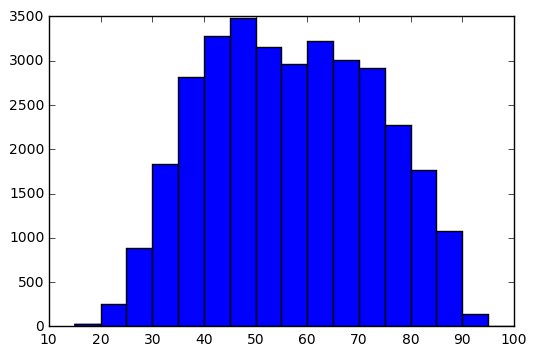

Age 56.36 56.00 16.20

Donna 0.63
Uomo  0.37

Coniugato 0.63
Celibe 0.29
Vedovo 0.03
Non indicato 0.02
Separato 0.01
Divorziato 0.01

IMPIEGATO 0.52
CASALINGA 0.28
PENSIONATO 0.12
STUDENTE 0.05
DISOCCUPATO 0.04


In [143]:
#regular
data = open(path + 'regular.csv', 'r')
header = data.readline().strip().split(';')
header[-1] = 'age'
header_map = {h: i for i, h in enumerate(header)}

ages = list()
sex_count = defaultdict(int)
civilstatus_count = defaultdict(int)
profession_count = defaultdict(int)

for row in data:
    fields = row.strip().split(';')
    if fields[header_map['age']] != '':
        if int(fields[header_map['age']]) <= 95:
            ages.append(int(fields[header_map['age']])-5)
            sex_count[fields[header_map['sesso']]] += 1
            civilstatus_count[fields[header_map['stato_civile']]] += 1
            profession_count[profession_map[fields[header_map['professione']]]] += 1
data.close()

plt.hist(ages, bins=range(15, 105, 5))
plt.show()

print 'Age', '%.2f' % np.mean(ages), '%.2f' % np.median(ages), '%.2f' % np.std(ages)

print '' 

for k in sorted(sex_count):
    print k, '%.2f' % (1.0*sex_count[k]/np.sum(sex_count.values()))

print ''    

for k in sorted(civilstatus_count, key=civilstatus_count.get, reverse=True):
    print k, '%.2f' % (1.0*civilstatus_count[k]/np.sum(civilstatus_count.values()))

print ''

for k in sorted(profession_count, key=profession_count.get, reverse=True)[:5]:
    print k, '%.2f' % (1.0*profession_count[k]/np.sum(profession_count.values()))

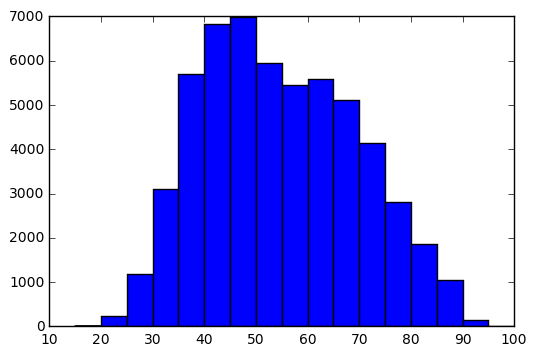

Age 54.19 53.00 14.86

Donna 0.66
Uomo  0.34

Coniugato 0.67
Celibe 0.28
Non indicato 0.02
Vedovo 0.02
Separato 0.01
Divorziato 0.01

IMPIEGATO 0.57
CASALINGA 0.26
PENSIONATO 0.09
STUDENTE 0.06
DISOCCUPATO 0.03


In [144]:
#changing
data = open(path + 'changing.csv', 'r')
header = data.readline().strip().split(';')
header[-1] = 'age'
header_map = {h: i for i, h in enumerate(header)}

ages = list()
sex_count = defaultdict(int)
civilstatus_count = defaultdict(int)
profession_count = defaultdict(int)

for row in data:
    fields = row.strip().split(';')
    if fields[header_map['age']] != '':
        if int(fields[header_map['age']]) <= 95:
            ages.append(int(fields[header_map['age']])-5)
            sex_count[fields[header_map['sesso']]] += 1
            civilstatus_count[fields[header_map['stato_civile']]] += 1
            profession_count[profession_map[fields[header_map['professione']]]] += 1
data.close()

plt.hist(ages, bins=range(15, 105, 5))
plt.show()

print 'Age', '%.2f' % np.mean(ages), '%.2f' % np.median(ages), '%.2f' % np.std(ages)

print '' 

for k in sorted(sex_count):
    print k, '%.2f' % (1.0*sex_count[k]/np.sum(sex_count.values()))

print ''    

for k in sorted(civilstatus_count, key=civilstatus_count.get, reverse=True):
    print k, '%.2f' % (1.0*civilstatus_count[k]/np.sum(civilstatus_count.values()))

print ''

for k in sorted(profession_count, key=profession_count.get, reverse=True)[:5]:
    print k, '%.2f' % (1.0*profession_count[k]/np.sum(profession_count.values()))

In [148]:
regular_customers_dict.keys()[:10]

[655361,
 262146,
 262147,
 33222860,
 262154,
 262160,
 45219859,
 174766,
 393239,
 393242]

In [145]:
regular_customers_dict = {k:0 for k in regular_customers}
changing_customers_dict = {k:0 for k in changing_customers}

In [150]:
data = open(path + 'dataset_coopometro_livorno_prov_filtered_iqr.csv', 'r')
header = data.readline().strip().split(';')
header_map = {h: i for i, h in enumerate(header)}

regular_tot_amount = defaultdict(list)
changing_tot_amount = defaultdict(list)

for row in data:
    fields = row.strip().split(';')
    customer_id = int(fields[header_map['customer_id']])
    importo = float(fields[header_map['importo']])
    if customer_id in regular_customers_dict:
        regular_tot_amount[customer_id].append(importo)
    else:
        changing_tot_amount[customer_id].append(importo)
        
data.close()

In [154]:
len(regular_tot_amount), len(changing_tot_amount)

(33784, 57184)

In [151]:
from calculate_aggregate_statistics import *

In [152]:
regular_std = dict()
regular_avg = dict()
regular_iqr = dict()
for customer_id in regular_tot_amount:
    stats = calculate_aggregate(regular_tot_amount[customer_id])
    regular_std[customer_id] = stats['std']
    regular_avg[customer_id] = stats['avg']
    regular_iqr[customer_id] = stats['iqr']

In [155]:
changing_std = dict()
changing_avg = dict()
changing_iqr = dict()
for customer_id in changing_tot_amount:
    stats = calculate_aggregate(changing_tot_amount[customer_id])
    changing_std[customer_id] = stats['std']
    changing_avg[customer_id] = stats['avg']
    changing_iqr[customer_id] = stats['iqr']

In [163]:
print 'std', calculate_aggregate(regular_std.values())['iqr']
print 'avg', calculate_aggregate(regular_iqr.values())['iqr']

std 10.2963001248
avg 13.75


In [164]:
print 'std', calculate_aggregate(changing_std.values())['iqr']
print 'avg', calculate_aggregate(changing_iqr.values())['iqr']

std 32.3388965347
avg 47.5
